# Analyzing
To get a better idea of the structure of the csv files, some methods for analyzing and visualizing can be found here.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import os
import warnings
# Root CSV files directory
dirname = "./data/absolute/3D_full/"

### Load

In [2]:
listfile = os.listdir(dirname)
listfile= sorted(listfile, key=str.casefold) 
data = []
for wordname in listfile:
    if wordname == ".DS_Store":
        continue
    for csv in os.listdir(dirname + wordname):
        filepath = os.path.join(dirname, wordname, csv)
        content = pd.read_csv(filepath, sep=';')
        data.append((wordname, content))

## Frame count distribution per word

In [3]:
row_lengths = {}
for (word, content) in data:
    row_lengths[word] = []
for (word, content) in data:
    row_lengths[word].append(content.shape[0])
print(row_lengths)

{'Bier': [35, 36, 47, 52, 34, 33, 44, 33, 41, 35, 48, 36, 46, 41, 57, 45, 41, 47, 72, 26, 45, 34, 41, 38, 38, 42, 45, 29, 45, 30, 28, 27, 44, 40, 22, 50, 58, 36, 31, 42, 67, 25, 50, 22, 51, 41], 'computer': [36, 50, 34, 28, 35, 38, 43, 52, 36, 15, 41, 35, 35, 83, 63, 73, 34, 35, 37, 61, 44, 47, 38, 37, 38, 50, 31, 38, 39, 39, 31, 52, 47, 38, 67, 69, 39, 33, 61, 34, 74, 41, 57, 52, 36, 59, 49, 34, 71, 41, 42, 50, 45, 58, 79, 83, 45, 53, 39, 44, 30, 36, 31, 78, 42, 39, 42, 38, 88, 41, 39, 41, 27, 47, 38, 51, 82, 28, 84, 37, 35, 37, 60, 96, 59, 54, 59, 49, 74, 36, 79, 93, 58, 39, 50, 32, 55, 56, 107, 71, 52, 51, 40, 65, 28, 81, 49, 83, 31, 37], 'deutschland': [43, 55, 57, 46, 48, 52, 50, 57, 63, 46, 35, 72, 37, 36, 64, 71, 45, 58, 46, 49, 47, 40, 49, 39, 40, 47, 42, 61, 43, 54, 45, 45, 41, 54, 38, 56, 59, 42, 69, 37, 26, 44, 48, 44, 51, 45, 53, 23, 76, 44, 45, 91, 54, 44, 37, 57, 43, 46, 53, 69, 41, 42, 27, 52, 36, 41, 34, 75, 48, 47, 48, 51, 43, 63, 20, 42, 58, 55, 50, 39, 46, 66, 31, 48

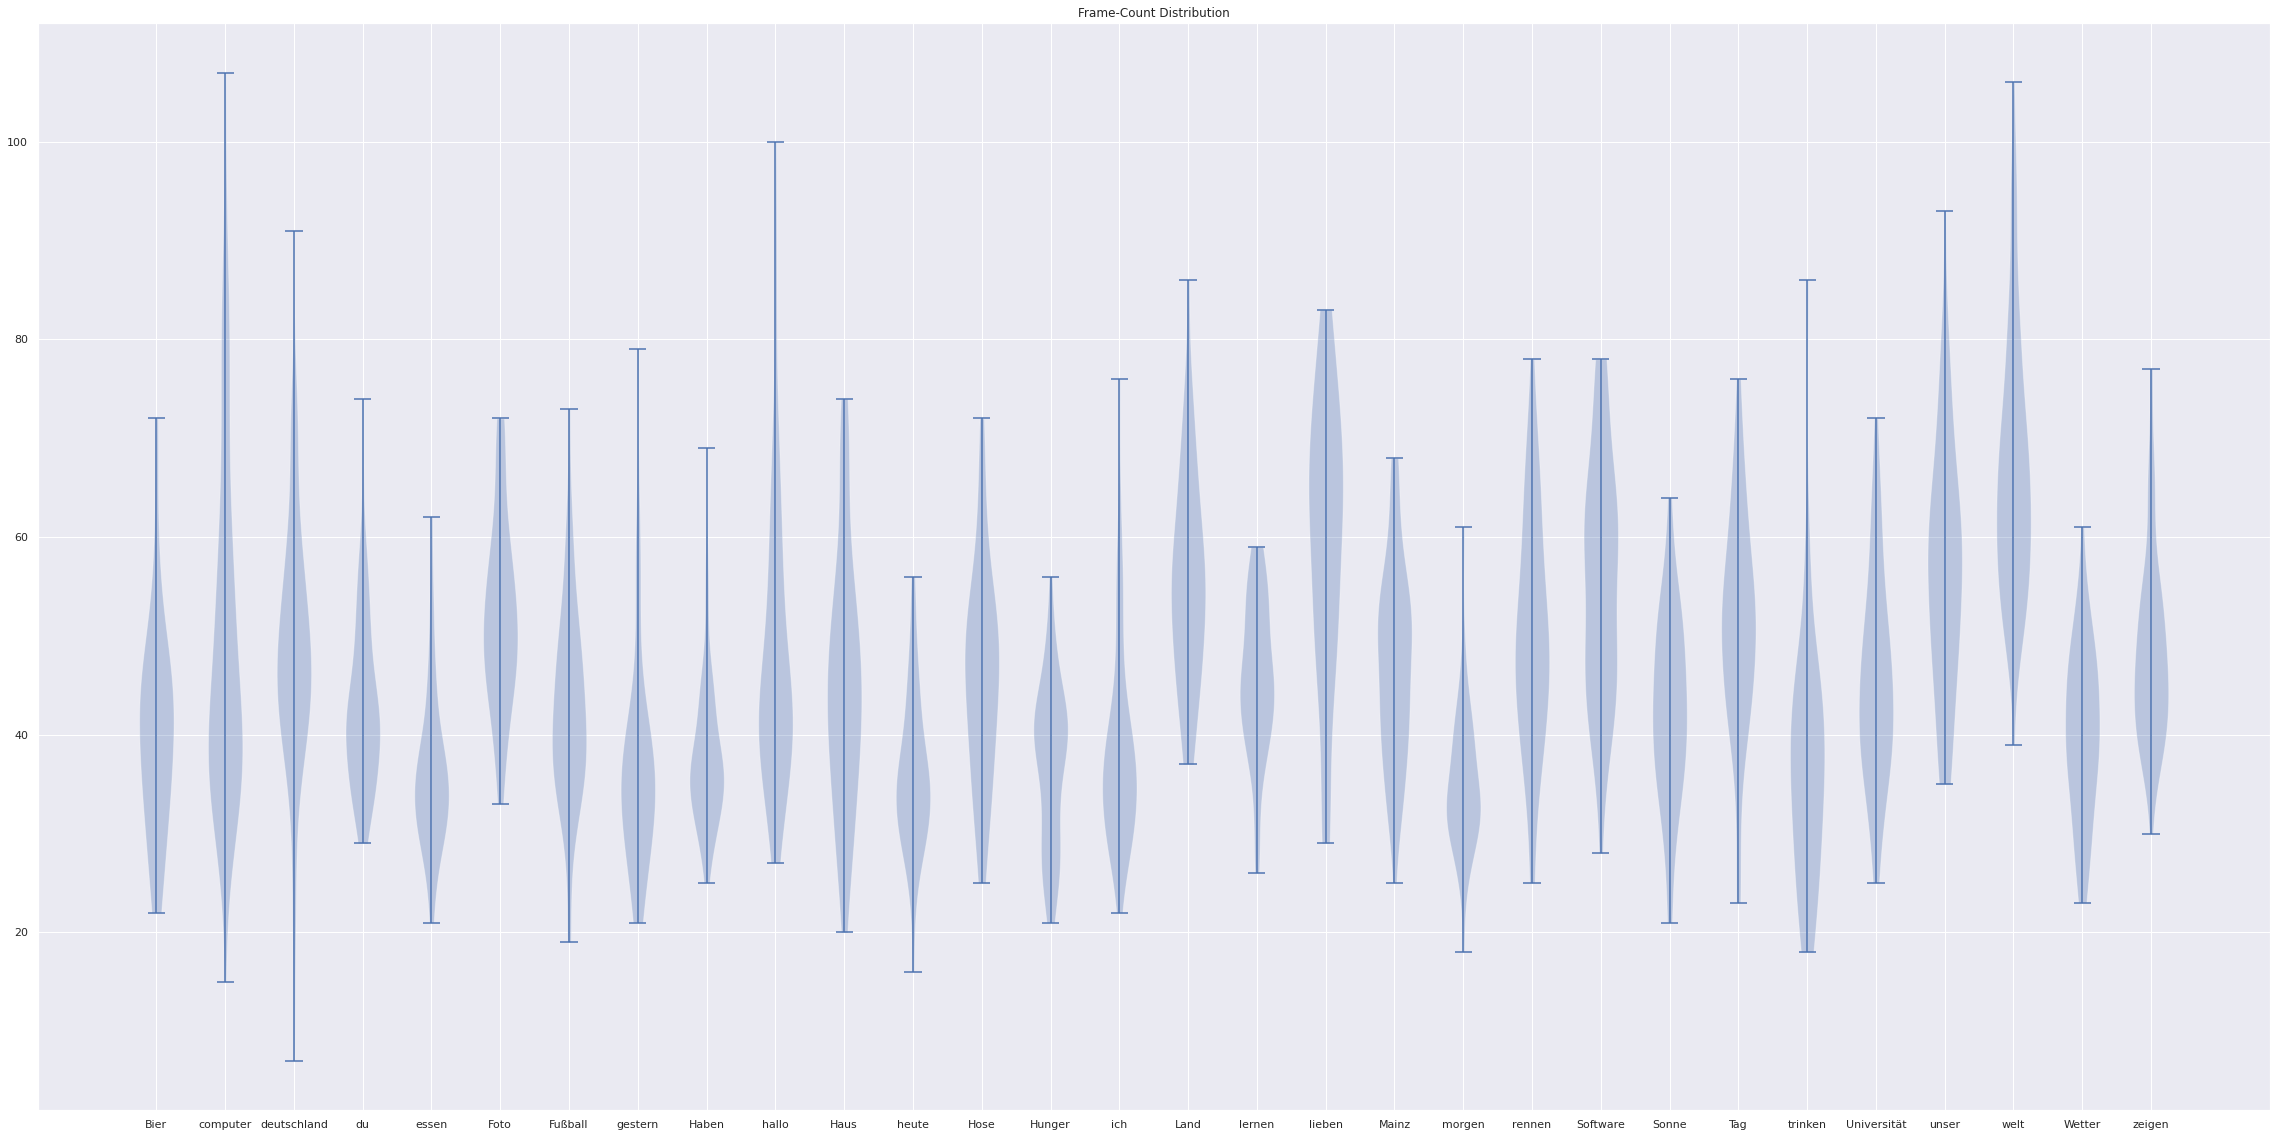

In [7]:
all_data = row_lengths.values()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(40,20))

# plot violin plot
axs.violinplot(all_data)
axs.set_title('Frame-Count Distribution')
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=row_lengths.keys())
plt.show()

In [46]:
sign = np.array(data[20][1])
np.nan_to_num(sign, copy=False)
rows = []
for row in sign:
    x, y = row[::2], row[1::2]
    rows.append((x,y))


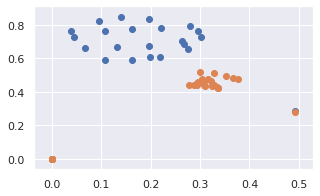

In [47]:
fig, ax = plt.subplots(figsize=(5, 3))
scat = ax.scatter(rows[1][0], rows[1][1])
def animate(i):
    ax.scatter(rows[i][0], rows[i][1])
anim = FuncAnimation(
fig, animate, interval=12, frames=len(rows)-1)